In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [13]:
df = pd.read_csv('play store data.csv')


In [14]:
df = df[df['Type'] == 'Paid'].copy()

In [15]:
df['Price'] = df['Price'].replace('[$,]', '', regex=True).astype(float)

In [16]:
df['Installs'] = df['Installs'].replace('[+,]', '', regex=True).replace('Varies with device', np.nan)
df['Installs'] = df['Installs'].dropna().astype(int)

In [17]:
df['Revenue'] = df['Installs'] * df['Price']


In [18]:
df = df[(df['Installs'] > 0) & (df['Revenue'] > 0)].copy()


In [19]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

<Figure size 1200x600 with 0 Axes>

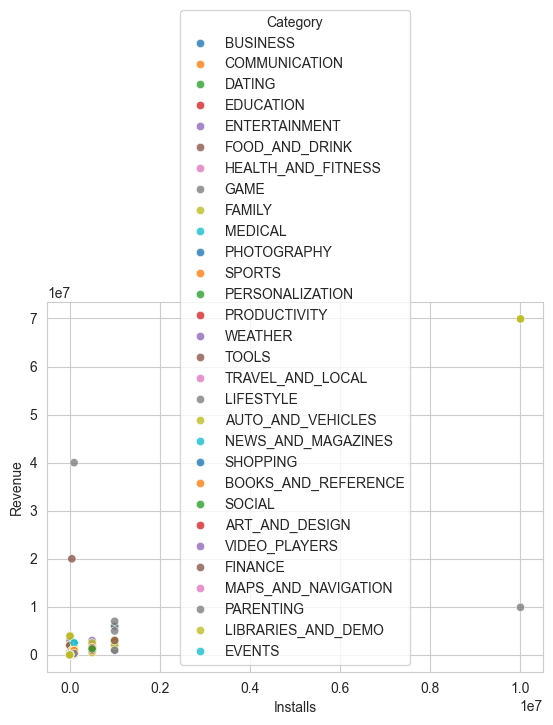

In [20]:
scatter = sns.scatterplot(data=df, x='Installs', y='Revenue', hue='Category', palette='tab10', edgecolor='w', alpha=0.8)


<Axes: xlabel='Installs', ylabel='Revenue'>

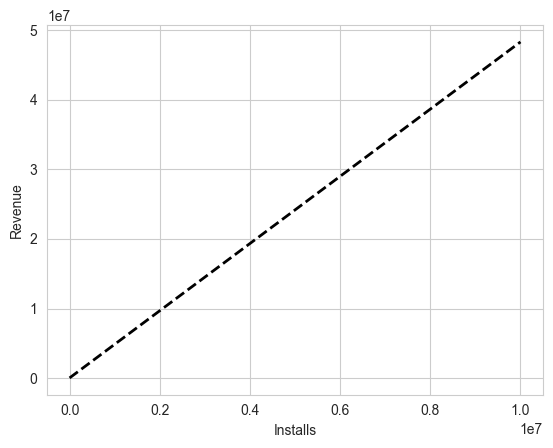

In [21]:
sns.regplot(data=df, x='Installs', y='Revenue', scatter=False, color='black', ci=None, 
            line_kws={'linestyle': 'dashed', 'linewidth': 2})

In [22]:
handles, labels = scatter.get_legend_handles_labels()